['../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '../..', '/Users/adrianpaeckelripoll/rbc-parameter-tuning/fig_scripts/contour', '/opt/anaconda3/envs/env1/lib/python39.zip', '/opt/anaconda3/envs/env1/lib/python3.9', '/opt/anaconda3/envs/env1/lib/python3.9/lib-dynload', '', '/opt/anaconda3/envs/env1/lib/python3.9/site-packages', '/opt/anaconda3/envs/env1/lib/python3.9/site-packages/IPython/extensions', '/Users/adrianpaeckelripoll/.ipython', '/Users/adrianpaeckelripoll/rbc-parameter-tuning/mtfunc']
(1, 75, 75, 7)
(1, 75, 75, 7)


 /var/folders/w3/j7m_f8sj3j326rztbz0fqhlm0000gn/T/ipykernel_26917/175849649.py:70: MatplotlibDeprecationWarning:Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().


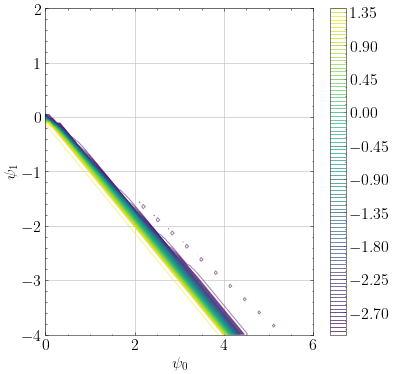

In [48]:
from __future__ import print_function, division, absolute_import
import os
import GPy
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy.ndimage import gaussian_filter1d
from scipy import signal
import sys
sys.path.insert(0,'../..')
print(sys.path)
from mtfunc.helper import *
import safeopt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import tqdm
# plt.style.use('science')

# mpl.rcParams['figure.figsize'] = (12, 4)
mpl.rcParams['axes.grid'] = True
hour=60
day=24*hour

Z=get_data('data/winter_c_3_1_2/cost_2022_03_06_2327.npy')
Q=get_data('data/winter_c_3_1_2/constraint_2022_03_06_2327.npy')
par1,par2=get_data('data/winter_c_3_1_2/meta_2022_03_06_2327.npy')
print(Z.shape)
print(Q.shape)
Q[:,:,:,1]=Q[:,:,:,1]-50
days=Q.shape[0]
n_costs=Z.shape[-1]
optcst=np.zeros((days,n_costs))
optpar=np.zeros((days,n_costs,2))
cost_list=['r_b','g_sf','g_sr','r_money','r_ps']
X,Y=np.meshgrid(par1,par2)
cst=Z[0,:,:,3]
Qf=Q[0,:,:,1]
Qs=Q[0,:,:,0]
Qsm=Q[0,:,:,2]
# cost_list=['r_ps','r_b','r_ss','g_sf','g_b','g_sr','g_g','r_price','r_money'])
with plt.style.context('science'):
    fig, ax = plt.subplots(figsize=(6,6))
    plt.rcParams.update({'font.size': 16})   
#     W = 5.8    # Figure width in inches, approximately A4-width - 2*1.25in margin
    plt.rcParams.update({
#         'figure.figsize': (W, W/(4/3)),     # 4:3 aspect ratio
        'font.size' : 16,                   # Set font size to 11pt
        'axes.labelsize': 16,               # -> axis labels
        'legend.fontsize': 16,              # -> legends
#         'font.family': 'lmodern',
#         'text.usetex': True,
#         'text.latex.preamble': (            # LaTeX preamble
#             r'\usepackage{lmodern}'
#             # ... more packages if needed
#         )
    })
    cst=Z[0,:,:,3]+Z[0,:,:,1]
#     cont=ax.contour(X.transpose(), Y.transpose(), cst,100,alpha=0.7)
    #     ax.contourf(X.transpose(), Y.transpose() ,Q_[:,:],levels=[-np.inf,-0,np.inf],colors=['black','white'],linestyles='-',alpha=0.5)
#     ax.contour(X.transpose(), Y.transpose() ,Qs[:,:],levels=100, alpha=0.5)
    ax.contour(X.transpose(), Y.transpose() ,Qsm[:,:],levels=100,alpha=0.5)
#     ax.contour(X.transpose(), Y.transpose() ,Qf[:,:],levels=[-np.inf,-5,0,np.inf],colors=['black','grey','white'],linestyles='-',alpha=0.5)    
#     plt.xlim([0,2])
#     plt.ylim([-0.8,0.2])
    plt.colorbar(cont)
    # plt.plot(a[0],a[1],'x')
    ax.set_xlabel(r'$\psi_0$')
    ax.set_ylabel(r'$\psi_1$')
#     plt.savefig('qs_contour')
    plt.show()

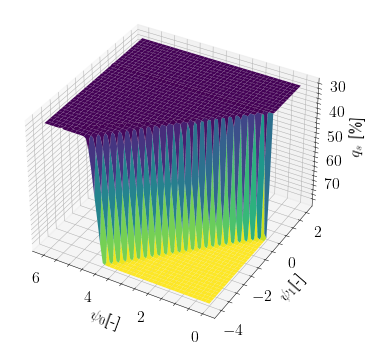

In [76]:
# cost_list=['r_ps','r_b','r_ss','g_sf','g_b','g_sr','g_g','r_price','r_money'])
with plt.style.context('science'):
    plt.rcParams.update({'font.size': 16})   
#     W = 5.8    # Figure width in inches, approximately A4-width - 2*1.25in margin
    plt.rcParams.update({
#         'figure.figsize': (W, W/(4/3)),     # 4:3 aspect ratio
        'font.size' : 16,                   # Set font size to 11pt
        'axes.labelsize': 16,               # -> axis labels
        'legend.fontsize': 16,              # -> legends
#         'font.family': 'lmodern',
#         'text.usetex': True,
#         'text.latex.preamble': (            # LaTeX preamble
#             r'\usepackage{lmodern}'
#             # ... more packages if needed
#         )
    })
    cst=Z[0,:,:,3]
    X,Y=np.meshgrid(par1,par2)
    fig = plt.figure(figsize=(6,6))
    ax = plt.axes(projection='3d')
#     ax.contour3D(X.transpose(), Y.transpose() ,Q[d,:,:,1]/10,10, cmap='viridis')
    ax.plot_surface(X.transpose(), Y.transpose() ,Qsm,cmap='viridis')
    ax.set_xlabel(r'$\psi_0$[-]')
    ax.set_ylabel(r'$\psi_1$[-]')

    ax.set_zlabel('$q_s$ [\%]')
    ax.view_init(-145, 60)
#     ax.invert_zaxis()
#     ax.set_xlim([0,2])
#     ax.set_ylim([-1,1])    
    plt.savefig('qsm_3d')